Import modules

In [ ]:
# CoLab

# 데이터 처리, 선형대수, 행렬 등 연산 모듈
import numpy as np
import pandas as pd
import scipy.stats
import random
import time
from typing import *

# 시각화 모듈
import matplotlib.pyplot as plt
%matplotlib inline

# 한국거래소 증권 데이터 스크래핑 모듈
# !pip install pykrx
# !pip install finance-datareader
from pykrx import stock as stock
# import FinanceDataReader as fdr

# 한글 폰트 사용을 위해서 세팅

from matplotlib import font_manager, rc
font_path = r"/content/drive/MyDrive/Colab Notebooks/korean.ttf"
  # 오류가 발생한다면, 경로를 "/content/drive/FindAlpha_RiskyAsset1/archive/korean.ttf"로 설정
  # 혹은 로컬 폰트 경로인 "C:\\WINDOWS\FONTS\malgun.ttf"로 설정
font = font_manager.FontProperties(fname = font_path).get_name()
rc("font", family = font)

In [27]:
# local
import numpy as np
import pandas as pd
import scipy.stats
import random
import time
from typing import *
import matplotlib.pyplot as plt
%matplotlib inline
from pykrx import stock

# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

# Data import

In [28]:
from_date = "2012-01-01"
to_date = "2022-12-31"
html = "http://kind.krx.co.kr/corpgeneral/corpList.do?method=download"
stock1 = "삼성전자"
stock2 = "카카오"

In [29]:
stock_code = pd.read_html(html, header = 0)[0] # html로 부터 모든 종목들의 회사명, 코드, 업종 등 데이터 가져오기기
stock_code.head()

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,DRB동일,4840,고무제품 제조업,"고무벨트(V벨트,콘베이어벨트,평벨트),프라스틱제품 제조,판매",1976-05-21,12월,류영식,http://drbworld.com,부산광역시
1,DSR,155660,1차 비철금속 제조업,합섬섬유로프,2013-05-15,12월,홍석빈,http://www.dsr.com,부산광역시
2,GS,78930,기타 금융업,지주회사/부동산 임대,2004-08-05,12월,"허태수, 홍순기 (각자 대표이사)",NaN,서울특별시
3,HDC현대산업개발,294870,건물 건설업,"외주주택, 자체공사, 일반건축, 토목 등",2018-06-12,12월,"최익훈, 정익희, 김회언 (각자 대표이사)",http://www.hdc-dvp.com,서울특별시
4,KG케미칼,1390,기초 화학물질 제조업,"콘크리트혼화제, 비료, 친환경농자재, 수처리제",1989-08-25,12월,"곽정현, 김재익",http://www.kgchem.co.kr,울산광역시


In [30]:
stock_code = stock_code[["종목코드", "회사명"]] # 위 데이터에서 종목코드, 회사명만 불러오기기
stock_code.head()

,종목코드,회사명
0,4840,DRB동일
1,155660,DSR
2,78930,GS
3,294870,HDC현대산업개발
4,1390,KG케미칼


In [31]:
stock_code["종목코드"] = stock_code["종목코드"].apply(
    lambda x: "0"*(6 - len(str(x))) + str(x)) 

# 종목 코드 앞에 0으로 채워넣어 6자리로 맞춰주는 함수 적용

stock_code.head()

,종목코드,회사명
0,004840,DRB동일
1,155660,DSR
2,078930,GS
3,294870,HDC현대산업개발
4,001390,KG케미칼


In [33]:
for stk in [stock1, stock2]:  
  globals()["index_{}".format(stk)] =  stock_code[stock_code["회사명"] == stk].index[0]

  globals()["code_{}".format(stk)] = stock_code.iloc[globals()["index_{}".format(stk)], 0]

print(code_삼성전자, code_카카오)

# stock1과 stock2의 index와 index활용하여 code 뽑아오기(stock_code DataFrame으로 부터)

005930 035720


In [32]:
stock1_price = stock.get_market_ohlcv(fromdate = "2012-01-01", todate = "2022-12-31", ticker = "005930", freq = "y")
stock2_price = stock.get_market_ohlcv(fromdate = "2012-01-01", todate = "2022-12-31", ticker = "035720", freq = "y")

# stock1과 stock2의 price data import

In [34]:
stock1_price.head()

,시가,고가,저가,종가,거래량
날짜,,,,,
2012-12-31,21400,30720,20220,30440,80370259.0
2013-12-31,30660,31680,24180,27440,63653314.0
2014-12-31,26960,29900,21560,26540,61188531.0
2015-12-31,26800,30200,20660,25200,59410465.0
2016-12-31,25200,36600,21760,36040,59482677.0


In [35]:
stock1_price["종가"] = stock1_price["종가"].apply(lambda p: p / stock1_price["종가"].iloc[0])
stock2_price["종가"] = stock2_price["종가"].apply(lambda p: p / stock2_price["종가"].iloc[0])

stock1_price["종가"].head()

# price data에서 종가만 뽑아오고 첫 데이터를 기준으로 지수화

날짜
2012-12-31    1.000000
2013-12-31    0.901445
2014-12-31    0.871879
2015-12-31    0.827858
2016-12-31    1.183968
Freq: A-DEC, Name: 종가, dtype: float64

In [36]:
normalized_df = pd.DataFrame()
normalized_df[stock1] = stock1_price["종가"]
normalized_df[stock2] = stock2_price["종가"]

normalized_df.head()

# 지수화된 DataFrame 생성 완료

,삼성전자,카카오
날짜,,
2012-12-31,1.000000,1.000000
2013-12-31,0.901445,0.922101
2014-12-31,0.871879,1.356758
2015-12-31,0.827858,1.271177
2016-12-31,1.183968,0.845236


In [37]:
percented_df = normalized_df.pct_change().dropna() # normalized_df를 수익률로 변환

for stocks in [stock1, stock2]:
  print(f"{from_date}부터 {to_date}까지 {stocks}의 기대수익률은 {percented_df[stocks].mean(): .4f}")
expected_return_stock1 = percented_df[stock1].mean()
expected_return_stock2 = percented_df[stock2].mean()

2012-01-01부터 2022-12-31까지 삼성전자의 기대수익률은  0.0988
2012-01-01부터 2022-12-31까지 카카오의 기대수익률은  0.2458


In [38]:
# 공분산 행렬
covariance_matrix = np.cov([percented_df[stock1], percented_df[stock2]])
covariance_df = pd.DataFrame(data = covariance_matrix, columns = [stock1, stock2], index = [stock1, stock2])

# 상관계수 행렬(공분산을 표본표준편차로 나누어 정규화한 값)
coefficient_df = pd.DataFrame(data = np.corrcoef([percented_df[stock1], percented_df[stock2]]),
                              columns = [stock1, stock2],
                              index = [stock1, stock2])

coefficient_df 

,삼성전자,카카오
삼성전자,1.000000,0.617009
카카오,0.617009,1.000000


In [39]:
coefficient_df = percented_df.corr()
coefficient_df

# DataFrame의 corr() 메서드 사용한 것과 동일함

,삼성전자,카카오
삼성전자,1.000000,0.617009
카카오,0.617009,1.000000


In [40]:
covariance_matrix[1,1] ** 0.5

0.6212764634410827

In [41]:
# 표준편차
i: int = 0
for stocks in [stock1, stock2]:
  print(f"{from_date}부터 {to_date}까지 {stocks}의 표준편차는 {covariance_matrix[i][i]**(0.5): .4f}")
  i += 1

# 공분산
print(f"{stock1}과 {stock2}의 공분산은 {covariance_matrix[0][1]: .4f}")

print("\n[공분산 행렬]\n", covariance_df)
print("\n[상관계수 행렬]\n", coefficient_df)

2012-01-01부터 2022-12-31까지 삼성전자의 표준편차는  0.3012
2012-01-01부터 2022-12-31까지 카카오의 표준편차는  0.6213
삼성전자과 카카오의 공분산은  0.1155

[공분산 행렬]
           삼성전자       카카오
삼성전자  0.090732  0.115467
카카오   0.115467  0.385984

[상관계수 행렬]
           삼성전자       카카오
삼성전자  1.000000  0.617009
카카오   0.617009  1.000000


# 포트폴리오

In [171]:
weight = 0.5
ratio = 0.02 # risk free

# 동일 가중치 weight 설정
weight_1 = weight
weight_2 = 1 - weight_1

portfolio_expected_return = (weight_1 * expected_return_stock1) + (weight_2 * expected_return_stock2)
print(f"{stock1}과 {stock2}가 {weight_1}:{weight_2}로 구성된 포트폴리오 수익률은 {portfolio_expected_return: .4f}")
portfolio_expected_return = portfolio_expected_return

# 포트폴리오 분산
portfolio_variance = (weight_1**2 * (covariance_matrix[0][0]**0.5)*2) \
  + (weight_2**2 * (covariance_matrix[1][1]**0.5)*2) + (2 * weight_1**2 * weight_2**2 * covariance_matrix[0][1])
print(f"{stock1}과 {stock2}가 {weight_1}:{weight_2}로 구성된 포트폴리오의 분산은 {portfolio_variance: .4f}")


# 포트폴리오 표준편차
portfolio_sigma = portfolio_variance**(0.5)
print(f"{stock1}과 {stock2}가 {weight_1}:{weight_2}로 구성된 포트폴리오의 표준편차는 {portfolio_sigma: .4f}")
portfolio_sigma = portfolio_sigma


# 포트폴리오의 샤프비율
risk_free = ratio
# 무위험수익률 2%(input ratio) 가정
sharpe_ratio = (portfolio_expected_return - risk_free) / portfolio_sigma
print(f"{stock1}과 {stock2}가 {weight_1}:{weight_2}로 포트폴리오의 샤프비율은 {sharpe_ratio: .4f}")

삼성전자과 카카오가 0.5:0.5로 구성된 포트폴리오 수익률은  0.1723
삼성전자과 카카오가 0.5:0.5로 구성된 포트폴리오의 분산은  0.4757
삼성전자과 카카오가 0.5:0.5로 구성된 포트폴리오의 표준편차는  0.6897
삼성전자과 카카오가 0.5:0.5로 포트폴리오의 샤프비율은  0.2208


### visualizing CAL
$$E(r_c) = w_pE(r_p) + w_fE(r_f)$$
$$Var(c) = w_p^2σ_p^2$$

In [172]:
# 포트폴리오 가중치 리스트 생성
weight_serial = np.linspace(0, 1, 11)    # 0부터 1까지 11등분하여 점진적으로 증가

# 완성포트폴리오 표준편차 계산
weighted_sigma = weight_serial * portfolio_sigma

# 완성포트폴리오 기대수익률 계산
weighted_return = risk_free + weighted_sigma * (portfolio_expected_return - risk_free/ portfolio_sigma)

weighted_return

array([0.02      , 0.02988433, 0.03976866, 0.04965299, 0.05953731,
       0.06942164, 0.07930597, 0.0891903 , 0.09907463, 0.10895896,
       0.11884329])

In [173]:
weighted_sigma

array([0.        , 0.06896959, 0.13793919, 0.20690878, 0.27587838,
       0.34484797, 0.41381757, 0.48278716, 0.55175675, 0.62072635,
       0.68969594])

In [169]:
weighted_sigma

array([0.        , 0.06896959, 0.13793919, 0.20690878, 0.27587838,
       0.34484797, 0.41381757, 0.48278716, 0.55175675, 0.62072635,
       0.68969594])

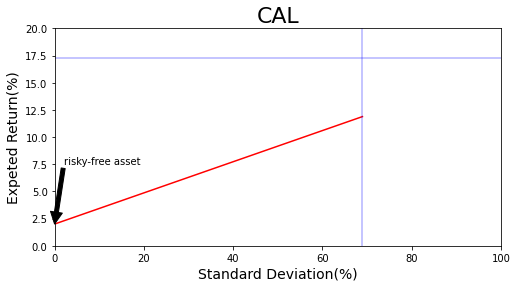

In [167]:
# 자본배분/할당선
plt.figure(figsize=(8,4))
plt.plot(weighted_sigma * 100, weighted_return * 100, "r", label = "CAL")

plt.annotate("risky-free asset", 
              xy = (0, risk_free *100), 
              xytext = (2, 7.5), 
              arrowprops = {'color':'black'})

plt.title("CAL", fontsize = 22)
plt.xlabel("Standard Deviation(%)", fontsize = 14)
plt.ylabel("Expeted Return(%)", fontsize = 14)

plt.axvline(portfolio_sigma * 100, color = "blue", linestyle = "solid", alpha = 0.3)
plt.axhline(portfolio_expected_return * 100, color = "blue", linestyle = "solid", alpha = 0.3)

plt.xlim([0, 100])
plt.ylim([0, 20])
plt.show()